<a href="https://colab.research.google.com/github/angelkp570/CursoSpark/blob/master/Clase1_Transformaciones_Acciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformaciones y acciones

In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [ ]:
import findspark
findspark.init()
from pyspark import SparkContext, SparkConf


In [ ]:
# ConfigureSparkUI
conf = SparkConf().set('spark.ui.port', '4050')


In [ ]:

sc = SparkContext(master = "local", appName = "transformacionesYAcciones",conf=conf)

Los RDDs por su calidad de ser distribuidos y paralelos nosotros los podremos crear de la siguiente manera con parallelize pasamos un conjunto de datos los cuales se van a encontrar de una manera distribuida en nuestro sistema.

Es importante tener en claro cual es el tipo de dato que van a tener los RDDs en este momento suena claro que un RDD es del tipo RDD.


In [ ]:
rdd1 = sc.parallelize([1, 2, 3])
type(rdd1)

pyspark.rdd.RDD

Para poder visualizar nuestro RDD utilizamos la operación collect, parece una lista pero no lo es

In [ ]:
rdd1.collect()

[1, 2, 3]

Spark funciona como una especie de grafo

In [ ]:
sc

<SparkContext master=local appName=transformacionesYAcciones>

In [ ]:
equiposOlimpicosRDD = sc.textFile("paises.csv").map(lambda line : line.split(","))

In [ ]:
equiposOlimpicosRDD.take(10)

[['id', 'equipo', 'sigla'],
 ['1', '30. Februar', 'AUT'],
 ['2', 'A North American Team', 'MEX'],
 ['3', 'Acipactli', 'MEX'],
 ['4', 'Acturus', 'ARG'],
 ['5', 'Afghanistan', 'AFG'],
 ['6', 'Akatonbo', 'IRL'],
 ['7', 'Alain IV', 'SUI'],
 ['8', 'Albania', 'ALB'],
 ['9', 'Alcaid', 'POR']]

# Acciones de modificación sobre RDDs (Clase 9)

Primera operación contar cuantas siglas (países) estan participando en los juegos Olimpicos.
Para esto utilizamos la función map y dentro una función lambda para regresar el valor del RDD en la posición 2, utilizando una tupla debido a que muchas de las operaciones internas como las va a procesar son con operaciones tipo llave - valor, sin embargo aunque las trabaja como llave-valor las termina convirtiendo a tuplas y antes de contar utilizamos el método distinct para contar sin duplicados

In [ ]:
equiposOlimpicosRDD.map(lambda x: (x[2])).distinct().count()

231

# groupByKey
Nos permite agrupar valores a partir de una llave
En este ejemplo vamos a consultar cuantos equipos posee cada país.
La función lambda hace referencia a las columnas que nosotros deseamos, la lógica nos dice que la función lambda debería ser así lambda x : x[1], x[2] para seleccionar la columna de equipos y de países pero esto no es así ya que todo se agrupa en un formato de llave-valor, es decir si hacemos un groupBy lo haría a partir de x[1]: llave y nosotros queremos que la llave sea x[2]
# mapValues  
Con parámetro de len para que nos muestre el número de equipos de cada país

In [ ]:
equiposOlimpicosRDD.map(lambda x: (x[2], x[1])).groupByKey().mapValues(len).take(5)

[('sigla', 1), ('AUT', 11), ('MEX', 9), ('ARG', 18), ('AFG', 1)]

si hacemos una variación en mapValues pero en lugar de len usamos una lista

In [ ]:
equiposOlimpicosRDD.map(lambda x: (x[2], x[1])).groupByKey()\
                        .mapValues(list).take(5)

[('sigla', ['equipo']),
 ('AUT',
  ['30. Februar',
   'Austria',
   'Austria-1',
   'Austria-2',
   'Breslau',
   'Brigantia',
   'Donar III',
   'Evita VI',
   'May-Be 1960',
   '"R.-V. Germania; Leitmeritz"',
   'Surprise']),
 ('MEX',
  ['A North American Team',
   'Acipactli',
   'Chamukina',
   'Mexico',
   'Mexico-1',
   'Mexico-2',
   'Nausikaa 4',
   'Tlaloc',
   'Xolotl']),
 ('ARG',
  ['Acturus',
   'Antares',
   'Arcturus',
   'Ardilla',
   'Argentina',
   'Argentina-1',
   'Argentina-2',
   'Blue Red',
   'Covunco III',
   'Cupidon III',
   'Djinn',
   'Gullvinge',
   'Matrero II',
   'Mizar',
   'Pampero',
   'Rampage',
   'Tango',
   'Wiking']),
 ('AFG', ['Afghanistan'])]

# filter
Filtrar los valores de solo un contenido que deseamos

In [ ]:
equiposArgentinos = equiposOlimpicosRDD.filter(lambda l: "ARG" in l)
equiposArgentinos.collect()

[['4', 'Acturus', 'ARG'],
 ['37', 'Antares', 'ARG'],
 ['42', 'Arcturus', 'ARG'],
 ['43', 'Ardilla', 'ARG'],
 ['45', 'Argentina', 'ARG'],
 ['46', 'Argentina-1', 'ARG'],
 ['47', 'Argentina-2', 'ARG'],
 ['119', 'Blue Red', 'ARG'],
 ['238', 'Covunco III', 'ARG'],
 ['252', 'Cupidon III', 'ARG'],
 ['288', 'Djinn', 'ARG'],
 ['436', 'Gullvinge', 'ARG'],
 ['644', 'Matrero II', 'ARG'],
 ['672', 'Mizar', 'ARG'],
 ['774', 'Pampero', 'ARG'],
 ['843', 'Rampage', 'ARG'],
 ['1031', 'Tango', 'ARG'],
 ['1162', 'Wiking', 'ARG']]

# Diferencia entre collect y take
Collect lo que hace es, todos los RDD que tenga el valor que nosotros deseamos lo manda a la computadora que ejecuto el collect. Esto puede provocar que el servidor se alente por la cantidad de datos y take toma solo una muestra de n elementos

Si nosotros no estamos seguros de cuantos datos tiene un RDD y no tenemos mucho tiempo, podemos utilizar la función countApprox la cual recibe un valor numérico que representa la cantidad de milisegundos, es decir va a contar hasta la cantidad de milisegundos indicados y si la cuanta va a tardar más de ese tiempo aborta la operación

In [ ]:
equiposOlimpicosRDD.countApprox(20)

1185

# Acciones de conteo sobre RDDs (clase 10)

Se importan los archivos de "deportista.csv" y "deportista2.csv"

Posteriormente se realiza una unión
En SQL tenemos la operacion de union y union all, las diferencias es que si en uno tenemos valores repetidos nos los deja y en el otro nos los quita.
En Spark solo esta union y ya se encarga de que no tengamos las duplicidades

In [ ]:
deportistaOlimpicoRDD = sc.textFile("deportista.csv").map(lambda l : l.split(","))
deportistaOlimpicoRDD2 = sc.textFile("deportista2.csv").map(lambda l : l.split(","))

deportistaOlimpicoRDD = deportistaOlimpicoRDD.union(deportistaOlimpicoRDD2)

Cunado hagamos estas cargas con uniones y no estemos seguros de la calidad de los datos que poseen los archivos, podemos realizar una acción que fuerce a utilizar todo el contenido (Menos collect) como count, si los archivos tienen la calidad mínima para que Spark pueda ejecutar la instrucción no tenderemos problema

In [ ]:
deportistaOlimpicoRDD.count()

135572

top(2) nos muestra las primeras dos líneas del archivo

In [ ]:
equiposOlimpicosRDD.top(2)

[['id', 'equipo', 'sigla'], ['999', 'Stella-2', 'NOR']]

In [ ]:
deportistaOlimpicoRDD.top(2)

[['deportista_id', 'nombre', 'genero', 'edad', 'altura', 'peso', 'equipo_id'],
 ['99999', 'Alexander Grant Alick Rennie', '1', '32', '182', '71', '967']]

Viendo el modelo relacional vemos que Deportista y Equipo se relacionan a través de Equipo_ID

Para poder hacer esta union primero tenemos que seleccionar las columnas de id(que en el modelo relacional se llama equipo_id) y equipo_id y a partir de eso hacer el join.
Primero hacemos un mapeo con el RDD deportistaOlimpicoRDD, al hacer el mapeo este funciona con un esquema de llave-valor por eso tengo que seleccionar la columna que posee el equipo_id y adicional queremos el resto del contenido que posee el RDD y lo encapsulamos en una lista o tupla y una vez seleccionado nuestro valor eje para poder hacer el join, lo siguiente es elegir con que RDD hacerlo.

En el segundo RDD elegimos cual es el valor eje sobre el cual operar el cual es id(equipo_id en el modelo relacional) y en este caso solo nos interesa el ultimo valor del RDD el cual es la sigla y encapsulamos en una lista o tupla

El resultado es:

[('equipo_id', (['deportista_id', 'nombre', 'genero', 'edad', 'altura', 'peso'], 'sigla'))]




In [ ]:
deportistaOlimpicoRDD.map(lambda l : [l[-1],l[:-1]]).join(equiposOlimpicosRDD.map(lambda x : [x[0], x[2]]))\
  .take(6)

[('199', (['1', 'A Dijiang', '1', '24', '180', '80'], 'CHN')),
 ('199', (['2', 'A Lamusi', '1', '23', '170', '60'], 'CHN')),
 ('199', (['602', 'Abudoureheman', '1', '22', '182', '75'], 'CHN')),
 ('199', (['1463', 'Ai Linuer', '1', '25', '160', '62'], 'CHN')),
 ('199', (['1464', 'Ai Yanhan', '2', '14', '168', '54'], 'CHN')),
 ('199', (['3605', 'An Weijiang', '1', '22', '178', '72'], 'CHN'))]

In [ ]:
deportistaOlimpicoRDD.map(lambda l : (l[-1],l[:-1])).join(equiposOlimpicosRDD.map(lambda x : (x[0], x[2])))\
  .take(6)

[('199', (['1', 'A Dijiang', '1', '24', '180', '80'], 'CHN')),
 ('199', (['2', 'A Lamusi', '1', '23', '170', '60'], 'CHN')),
 ('199', (['602', 'Abudoureheman', '1', '22', '182', '75'], 'CHN')),
 ('199', (['1463', 'Ai Linuer', '1', '25', '160', '62'], 'CHN')),
 ('199', (['1464', 'Ai Yanhan', '2', '14', '168', '54'], 'CHN')),
 ('199', (['3605', 'An Weijiang', '1', '22', '178', '72'], 'CHN'))]

# takeSample

esta operación nos permite elegir una muestra aleatoria de valores, el primer parámetro es para elegir si queremos valores repetidos o no, el siguiente parámetro es cuantos valores quiero visualizar y el tercer parámetro es una semilla aleatoria

In [ ]:
deportistaOlimpicoRDD.map(lambda l : (l[-1],l[:-1])).join(equiposOlimpicosRDD.map(lambda x : (x[0], x[2])))\
  .takeSample(False, 6, 25)

[('362', (['131505', 'Steven Woodburn', '1', '24', '185', '90'], 'FRA')),
 ('967', (['13626', 'Jill Brresen', '2', '22', '170', '57'], 'RSA')),
 ('482', (['44299', 'Gumundur Gumundsson', '1', '23', '174', '77'], 'ISL')),
 ('970', (['68062', 'Lee MinHui', '2', '28', '174', '65'], 'KOR')),
 ('794', (['92442', 'Luis Paz Zoldan', '1', '19', '187', '82'], 'PER')),
 ('413', (['26822', 'Jared Mark Deacon', '1', '24', '185', '77'], 'GBR'))]

Cargamos el archivo "resultados.csv"

In [ ]:
resultado = sc.textFile("resultados.csv").map(lambda line: line.split(","))

No me interesa los jugadores que no han ganado una medalla

Para esto aplicamos un filter donde verificamos a través de una lambda si el valor 'NA' no aparace, de ser así se filtra

In [ ]:
resultadoGanador = resultado.filter(lambda l: 'NA' not in l[1])

In [ ]:
resultadoGanador.take(2)

[['resultado_id', 'medalla', 'deportista_id', 'juego_id', 'evento_id'],
 ['4', 'Gold', '4', '2', '4']]

# Reto
hacer un join entre Equipo y deportista con el nuevo RDD creado

Con la siguiente instrucción se buscaba hacer el join con las tres tablas pero esta forma fue incorrecta

In [ ]:
resultadoGanador.map(lambda l: (l[2],l[1])).join(deportistaOlimpicoRDD.map(lambda l : (l[-1],l[:-1])).join(equiposOlimpicosRDD.map(lambda x : (x[0], x[2]))))\
  .takeSample(False, 6, 20)

[('404',
  ('Gold', (['25277', 'Michael Ebo Dankwa', '1', '24', '163', '48'], 'GHA'))),
 ('705',
  ('Gold',
   (['92932', 'Klaas Johan Klaas Jan Pen', '1', '45', '0', '0'], 'NED'))),
 ('705',
  ('Bronze',
   (['119000', 'Gerardus Franciscus Gerard Tebroke', '1', '30', '184', '70'],
    'NED'))),
 ('507',
  ('Bronze', (['91031', 'Francesco Panetta', '1', '21', '175', '64'], 'ITA'))),
 ('619',
  ('Gold', (['111339', 'Siow Yi Ting', '2', '16', '169', '49'], 'MAS'))),
 ('705',
  ('Gold',
   (['13725',
     'Gerard Dagobert Henri Bosch van Drakestein',
     '1',
     '20',
     '0',
     '0'],
    'NED')))]

Se trata de hacer el join primero con dos tablas Deportista y Equipos

De la tabla Deportista se utiliza el valor llave de

In [ ]:
primerJoin = deportistaOlimpicoRDD.map(lambda l : (l[-1],l[:-1])).join(equiposOlimpicosRDD.map(lambda x : (x[0], x[2])))
primerJoin.take(6)

[('199', (['1', 'A Dijiang', '1', '24', '180', '80'], 'CHN')),
 ('199', (['2', 'A Lamusi', '1', '23', '170', '60'], 'CHN')),
 ('199', (['602', 'Abudoureheman', '1', '22', '182', '75'], 'CHN')),
 ('199', (['1463', 'Ai Linuer', '1', '25', '160', '62'], 'CHN')),
 ('199', (['1464', 'Ai Yanhan', '2', '14', '168', '54'], 'CHN')),
 ('199', (['3605', 'An Weijiang', '1', '22', '178', '72'], 'CHN'))]

In [ ]:
resultadoGanador.map(lambda l: (l[2],l[1])).join(primerJoin.map(lambda l: [l[1][0][0],l[1][1][0:]])).take(6)

[('4', ('Gold', 'SWE')),
 ('16', ('Bronze', 'FIN')),
 ('20', ('Gold', 'NOR')),
 ('20', ('Bronze', 'NOR')),
 ('20', ('Silver', 'NOR')),
 ('20', ('Bronze', 'NOR'))]

In [ ]:
resultadoGanador.map(lambda l: (l[2],l[1])).join(primerJoin.map(lambda l: [l[1][0][0],l[1][0][1:]])).take(6)

[('4', ('Gold', ['Edgar Lindenau Aabye', '1', '34', '0', '0'])),
 ('16', ('Bronze', ['Juhamatti Tapio Aaltonen', '1', '28', '184', '85'])),
 ('20', ('Gold', ['Kjetil Andr Aamodt', '1', '20', '176', '85'])),
 ('20', ('Bronze', ['Kjetil Andr Aamodt', '1', '20', '176', '85'])),
 ('20', ('Silver', ['Kjetil Andr Aamodt', '1', '20', '176', '85'])),
 ('20', ('Bronze', ['Kjetil Andr Aamodt', '1', '20', '176', '85']))]

In [ ]:
deportistaPaises = deportistaOlimpicoRDD\
  .map(lambda l: [l[-1],l[:-1]])\
  .join(equiposOlimpicosRDD.map(lambda x: [x[0],x[2]]))

In [ ]:
deportistaPaises.join(resultadoGanador).take(6)

[('74',
  ((['65', 'Patimat Abakarova', '2', '21', '165', '49'], 'AZE'), 'Gold')),
 ('74', ((['129', 'Ruslan Abbasov', '1', '22', '181', '74'], 'AZE'), 'Gold')),
 ('74', ((['130', 'Tural Abbasov', '1', '18', '182', '76'], 'AZE'), 'Gold')),
 ('74', ((['131', 'Tran Abbasova', '2', '33', '159', '53'], 'AZE'), 'Gold')),
 ('74',
  ((['335', 'Abdulqdir Abdullayev', '1', '28', '188', '91'], 'AZE'), 'Gold')),
 ('74',
  ((['336', 'Arif Yadulla Abdullayev', '1', '27', '164', '60'], 'AZE'),
   'Gold'))]

# Operaciones numéricas


Con la siguiente instrucción se logra hacer el join con tres tablas, como resultado obtenemos el id_deportista, la medalla, el nombre y sus estadísticas y el país al que pertenece

In [ ]:
resultadoGanador.map(lambda l: (l[2],l[1])).join(primerJoin.map(lambda l: (l[1][0][0],(l[1][0][1:],l[1][1][0:])))).take(6)

[('4', ('Gold', (['Edgar Lindenau Aabye', '1', '34', '0', '0'], 'SWE'))),
 ('16',
  ('Bronze', (['Juhamatti Tapio Aaltonen', '1', '28', '184', '85'], 'FIN'))),
 ('20', ('Gold', (['Kjetil Andr Aamodt', '1', '20', '176', '85'], 'NOR'))),
 ('20', ('Bronze', (['Kjetil Andr Aamodt', '1', '20', '176', '85'], 'NOR'))),
 ('20', ('Silver', (['Kjetil Andr Aamodt', '1', '20', '176', '85'], 'NOR'))),
 ('20', ('Bronze', (['Kjetil Andr Aamodt', '1', '20', '176', '85'], 'NOR')))]

En esta clase se asigna a cada tipo de medalla un valor númerico para posteriormente hacer una suma de todas las medallas que posee un país y encontrar el valor de puntaje que han tenido los países a lo largo del tiempo

In [ ]:
valoresMedallas = {'Gold' : 7,
'Silver' : 5,
'Bronze' : 4}

Esta instrucción es con la que hicimos el join entre tres tablas solo que la guardamos en una variable llamanda <b>paisesMedallas</b>

In [ ]:
paisesMedallas = resultadoGanador.map(lambda l: (l[2],l[1])).join(primerJoin.map(lambda l: (l[1][0][0],(l[1][0][1:],l[1][1][0:]))))

Hacemos un pequeño filtro para obtener tuplas o parejas de datos conformados por la sigla del país y el tipo de medalla que ganó

In [ ]:
paisesMedallas.map(lambda x: (x[1][1][1],x[1][0])).take(4)

[('SWE', 'Gold'), ('FIN', 'Bronze'), ('NOR', 'Gold'), ('NOR', 'Bronze')]

La función add de la librería operator. En Spark, esta importación generalmente se utiliza para realizar operaciones de suma en el contexto de programación funcional.

La función add de la librería operator simplemente realiza una suma de dos elementos. En el contexto de Spark, puede ser utilizada junto con funciones como map o reduce para realizar operaciones de suma en RDDs (Resilient Distributed Datasets) o DataFrames.

In [ ]:
from operator import add

#Ejemplos add

In [ ]:
# Configuración del SparkContext
# sc = SparkContext("local", "Ejemplo Spark")

# Crear un RDD con datos de ejemplo
data = [1, 2, 3, 4, 5]
rdd = sc.parallelize(data)

# Utilizar la función add junto con reduce para sumar todos los elementos del RDD
suma_total = rdd.reduce(add)

# Imprimir el resultado
print("La suma total es:", suma_total)

La suma total es: 15


En este ejemplo, se crea un RDD con datos de ejemplo y se utiliza la función map junto con add para sumar 1 a cada elemento del RDD. Luego, se recogen los resultados y se imprimen.

In [ ]:
# Configuración del SparkContext
# sc = SparkContext("local", "Ejemplo Spark")

# Crear un RDD con datos de ejemplo
data = [1, 2, 3, 4, 5]
rdd = sc.parallelize(data)

# Utilizar la función add junto con map para sumar 1 a cada elemento del RDD
rdd_sumado = rdd.map(lambda x: add(x, 1))

# Recoger los resultados y mostrarlos
resultados = rdd_sumado.collect()
print("Elementos del RDD después de sumar 1:", resultados)

Elementos del RDD después de sumar 1: [2, 3, 4, 5, 6]


La siguiente instrucción nos devuelve una lista donde cada elemento es una tupla conformada por dos valores ('Sigla', 'Medalla') adicional a esto vemos que 'Medalla' es nuestro valor llave del diccionario valoresMedallas, esto lo aprovechamos para acceder al valor y reemplazarlo por el valor numérico de cada medalla

In [ ]:
paisesMedallas.map(lambda x: (x[1][1][1],valoresMedallas[x[1][0]])).take(4)

[('SWE', 7), ('FIN', 4), ('NOR', 7), ('NOR', 4)]

In [ ]:
paisesMedallas = paisesMedallas.map(lambda x: (x[1][1][1],valoresMedallas[x[1][0]]))

#Ejemplo con la función reduceByKey
La función reduceByKey en Spark es una transformación que se utiliza para agrupar los elementos de un RDD por clave y luego aplicar una función de reducción a esos grupos. La operación de reducción se realiza por clave, lo que significa que se aplica a todos los elementos que tienen la misma clave.

La función de reducción debe ser una función que tome dos argumentos y devuelva un resultado reducido. Esta función se aplica a los pares de valores asociados a una misma clave en el RDD.



In [ ]:
#from pyspark import SparkContext

# Configuración del SparkContext
#sc = SparkContext("local", "Ejemplo Spark")

# Crear un RDD con pares clave-valor de ejemplo
data = [("a", 1), ("b", 2), ("a", 3), ("b", 4), ("c", 5)]

# Convertir la lista en un RDD
rdd = sc.parallelize(data)

# Aplicar reduceByKey para sumar los valores por clave
resultado = rdd.reduceByKey(lambda x, y: x + y)

# Recoger y mostrar los resultados
resultados = resultado.collect()
print("Resultados de reduceByKey:", resultados)

Resultados de reduceByKey: [('a', 4), ('b', 6), ('c', 5)]


En este ejemplo, el RDD inicial contiene pares clave-valor, donde las claves son letras y los valores son números. La función reduceByKey se utiliza para sumar los valores asociados a cada clave. El resultado será un nuevo RDD donde las claves son únicas y los valores son el resultado de la suma de los valores correspondientes a esa clave.

Con la siguiente instrucción utilizamos la función reduceByKey para sumar los valores asociados a la llave y como esta función debe recibir dos parámetros le pasamos como argumento la función add. Finalmente con sortBy ordenamos los valores de forma ascendente

In [ ]:
conclusion = paisesMedallas.reduceByKey((add)).sortBy(lambda x: (x[0]), ascending=True)

In [ ]:
conclusion.take(35)

[('AFG', 8),
 ('AHO', 5),
 ('ALB', 16),
 ('ALG', 87),
 ('ANZ', 193),
 ('ARG', 1465),
 ('ARM', 90),
 ('AUS', 6755),
 ('AUT', 2292),
 ('AZE', 206),
 ('BAH', 198),
 ('BAR', 4),
 ('BDI', 12),
 ('BEL', 2372),
 ('BER', 4),
 ('BLR', 575),
 ('BOH', 53),
 ('BOT', 5),
 ('BRA', 2402),
 ('BRN', 16),
 ('BUL', 1678),
 ('CAN', 7209),
 ('CHI', 146),
 ('CHN', 5362),
 ('CIV', 16),
 ('CMR', 154),
 ('COL', 131),
 ('CRC', 20),
 ('CRO', 730),
 ('CUB', 2262),
 ('CYP', 5),
 ('CZE', 594),
 ('DEN', 3156),
 ('DJI', 4),
 ('DOM', 39)]

In [ ]:
import matplotlib.pyplot as plt

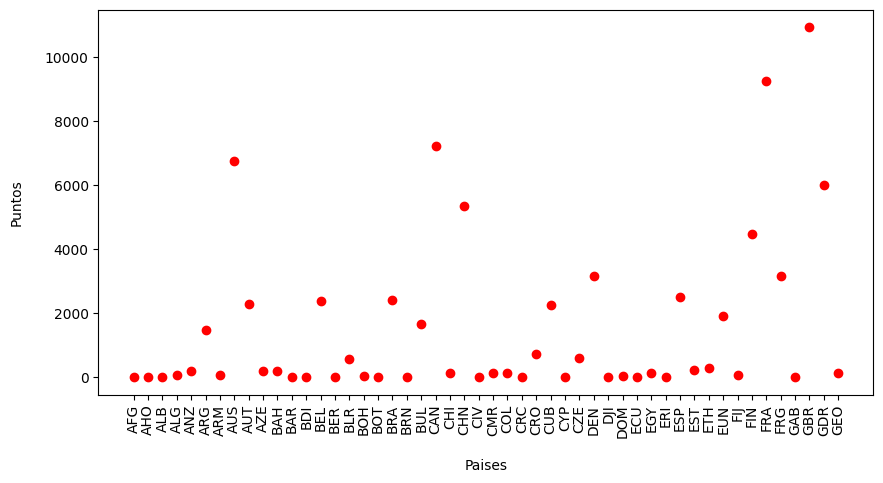

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(conclusion.map(lambda x:x[0]).take(50),conclusion.map(lambda x:x[1]).take(50)
            , color='r')
plt.xticks(rotation=90)
plt.xlabel('Paises',labelpad=15)
plt.ylabel('Puntos',labelpad=15)
plt.show()

#Segunda manera de resolver el ejercicio sobre la suma de los valores de las medellas de cada país, sin utilizar la función add
La variable paisesMedallas almacena el join de las tres tablas

In [ ]:
paisesMedallas.take(5)

[('SWE', 7), ('FIN', 4), ('NOR', 7), ('NOR', 4), ('NOR', 5)]

# Ejemplo de la función groupByKey
La función groupByKey en Spark es una transformación que agrupa los elementos de un RDD por clave, creando pares clave-iterador. La operación de agrupación se realiza por clave, de manera que los elementos que comparten la misma clave se agrupan juntos y se obtiene un iterador sobre esos elementos.

El resultado de groupByKey es un nuevo RDD donde cada elemento es un par clave-iterador. Puedes usar este iterador para iterar sobre todos los elementos asociados a una clave específica.


In [ ]:
#from pyspark import SparkContext

# Configuración del SparkContext
#sc = SparkContext("local", "Ejemplo Spark")

# Crear un RDD con pares clave-valor de ejemplo
data = [("a", 1), ("b", 2), ("a", 3), ("b", 4), ("c", 5)]

# Convertir la lista en un RDD
rdd = sc.parallelize(data)

# Aplicar groupByKey para agrupar por clave
resultado = rdd.groupByKey()

# Recoger y mostrar los resultados
resultados = resultado.collect()

# Imprimir los resultados
for key, values in resultados:
    print(f"Clave: {key}, Valores: {list(values)}")

Clave: a, Valores: [1, 3]
Clave: b, Valores: [2, 4]
Clave: c, Valores: [5]


In [ ]:
resultado.collect()

[('a', <pyspark.resultiterable.ResultIterable at 0x7fbc8da41ba0>),
 ('b', <pyspark.resultiterable.ResultIterable at 0x7fbc8da43970>),
 ('c', <pyspark.resultiterable.ResultIterable at 0x7fbc8da436a0>)]

En este ejemplo, el RDD inicial contiene pares clave-valor, donde las claves son letras y los valores son números. La función groupByKey se utiliza para agrupar los valores asociados a cada clave. El resultado es un nuevo RDD donde cada elemento es un par clave-iterador.

#Ejemplo mapValues

La función mapValues en Spark es una transformación que se aplica a cada valor de un par clave-valor en un RDD, manteniendo la clave sin cambios. La idea es aplicar una función específica solo a los valores, dejando las claves inalteradas.

La función proporcionada como argumento se aplica a cada valor del RDD, y la clave se mantiene igual. Esto es útil cuando solo deseas transformar los valores de un RDD manteniendo las claves inalteradas.


In [ ]:
#from pyspark import SparkContext

# Configuración del SparkContext
#sc = SparkContext("local", "Ejemplo Spark")

# Crear un RDD con pares clave-valor de ejemplo
data = [("a", 1), ("b", 2), ("a", 3), ("b", 4), ("c", 5)]

# Convertir la lista en un RDD
rdd = sc.parallelize(data)

# Aplicar mapValues para duplicar cada valor
resultado = rdd.mapValues(lambda x: x * 2)

# Recoger y mostrar los resultados
resultados = resultado.collect()
print("Resultados de mapValues:", resultados)

Resultados de mapValues: [('a', 2), ('b', 4), ('a', 6), ('b', 8), ('c', 10)]


En este ejemplo, el RDD inicial contiene pares clave-valor, donde las claves son letras y los valores son números. La función mapValues se utiliza para duplicar cada valor en el RDD, mientras que las claves permanecen inalteradas.

In [ ]:
paisesPuntaje = paisesMedallas.map(lambda x: (x[0],x[1]))\
        .groupByKey()\
        .mapValues(sum)\
        .sortBy(lambda x: x[1], ascending=True)

In [ ]:
paisesPuntaje.take(35)

[('IRQ', 4),
 ('BAR', 4),
 ('MRI', 4),
 ('ERI', 4),
 ('GUY', 4),
 ('WIF', 4),
 ('MON', 4),
 ('DJI', 4),
 ('TOG', 4),
 ('BER', 4),
 ('CYP', 5),
 ('GUA', 5),
 ('TKM', 5),
 ('AHO', 5),
 ('TGA', 5),
 ('SUD', 5),
 ('ISV', 5),
 ('BOT', 5),
 ('SEN', 5),
 ('GAB', 5),
 ('JOR', 7),
 ('UAE', 7),
 ('NEP', 7),
 ('AFG', 8),
 ('UAR', 9),
 ('ZAM', 9),
 ('NIG', 9),
 ('SRI', 10),
 ('TAN', 10),
 ('SUR', 11),
 ('MOZ', 11),
 ('BDI', 12),
 ('GRN', 12),
 ('ECU', 12),
 ('KGZ', 13)]

In [ ]:
#sc.stop()  #para liberar la memoria